# 1.0 Beispiele für Klassifikationen mit SciKit-Learn

## Klassifikation ohne Preprocessing
Zunächst werden hier alle nötigen Schritte unternommen um aus einen Datensatz ein typisches Klassifikationsmodell zu trainieren.
Dabei sind folgende Punkte entscheidend:
1. Import aller nötigen Bibliotheken
2. Import des Datensatzes und Überführung in ein Pandas-Dataframe
3. Datensatz verstehen
4. Wandlung der Klassen in numerische Werte
5. Splitten des Datensatzes in Training- und Testdaten
6. Trainieren des gewählten Modells und Überprüfung des Trainingsdatensatzes anhand der Loss-Kurve und der Confusion Matrix
7. Überprüfen des Testdatensatzes. Dieser gibt Auskunft darüber ob das Modell ausreichend verallgemeinert.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Import aller nötigen Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 2. Import des Datensatzes und Überführung in ein Pandas-Dataframe

# Alternative 1: Lade den Iris-Datenset aus dem Seaborn-Archiv
#iris = sns.load_dataset("iris")
#Alternative 2: Laden den Datensatz von einem lokalen Platz
#iris = pd.read_csv('data/iris_cleaned.csv')
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/iris_cleaned.csv')
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# 3. Datensatz verstehen
len(iris)

150

In [ ]:
# 3. Datensatz verstehen
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054533,3.758667,1.198667
std,0.828066,0.433205,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# 3. Datensatz verstehen
iris.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109532,0.871754,0.817954
sepal width,-0.109532,1.000000,-0.420795,-0.356862
petal length,0.871754,-0.420795,1.000000,0.962757
petal width,0.817954,-0.356862,0.962757,1.000000


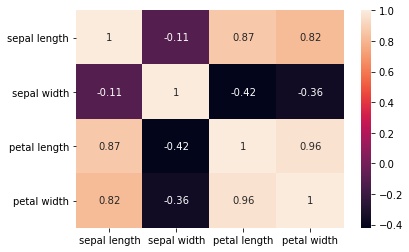

In [ ]:
# Korrelation in einer Heatmap darstellen
corrmat = iris.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

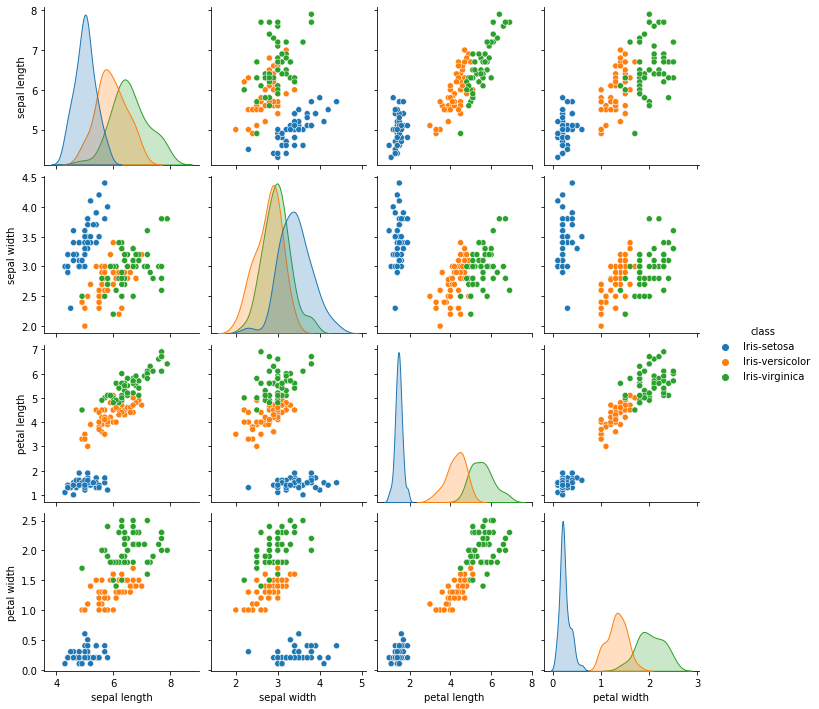

In [ ]:
# 3. Datensatz verstehen
sns.pairplot(iris, hue="class", height=2.5)

In [ ]:
# 4. Wandlung der Klassen in numerische Werte


# Die 3 zu erkennenden Klassifikationsklassen werden zu numerischen Werten 0, 1 bzw. 2 umgewandelt.
iris.loc[iris['class']=='Iris-setosa','class']=0
iris.loc[iris['class']=='Iris-versicolor','class']=1
iris.loc[iris['class']=='Iris-virginica','class']=2
iris = iris.apply(pd.to_numeric)
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Überführen des Pandas-Dataframe in einen numpy-array
iris_array = iris.values # oder iris.to_numpy()
print(type(iris_array))

<class 'numpy.ndarray'>


In [ ]:
print(type(train_test_split))

<class 'function'>


In [ ]:
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 5. Splitten des Datensatzes in Training- und Testdaten

# Das Datenset wird in zwei separate Kategorie gespaltet: Testdaten und Trainingsdaten.
# 80% der Daten werden zum Trainieren und 20% zum Testen des Modells verwendet.
# Da es sich bei der Eingabe um einen Vektor handelt, werden wird den Großbuchstaben X benutzen;
# Für die Ausgabe hingegen handelt es sich um ein einzelner Werte,
# daher die Bezeichung mit dem Kleinbuchstaben y

X_train, X_test, y_train, y_test = train_test_split(iris_array[:,:4], iris_array[:,4], test_size=0.2)
#print("Das ist mein Testdatensatz: ",X_test)
#print("Und das ist mein gesuchtes Target im Testdatensatz: ", y_test)

In [ ]:
print(X_test)

[[5.8 2.8 5.1 2.4]
 [6.6 2.9 4.6 1.3]
 [6.7 3.  5.2 2.3]
 [6.1 2.9 4.7 1.4]
 [5.  3.4 1.6 0.4]
 [5.2 4.1 1.5 0.1]
 [5.2 3.5 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [5.5 2.5 4.  1.3]
 [4.9 3.1 1.5 0.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.7 4.1 1. ]
 [5.6 3.  4.5 1.5]
 [5.7 2.9 4.2 1.3]
 [5.2 2.7 3.9 1.4]
 [6.8 3.2 5.9 2.3]
 [7.9 3.8 6.4 2. ]
 [7.6 3.  6.6 2.1]
 [5.9 3.  4.2 1.5]
 [6.4 2.8 5.6 2.2]
 [4.9 2.4 3.3 1. ]
 [5.  2.  3.5 1. ]
 [6.  2.7 5.1 1.6]
 [6.  3.  4.8 1.8]
 [5.1 3.5 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [7.  3.2 4.7 1.4]
 [6.2 2.9 4.3 1.3]
 [5.9 3.  5.1 1.8]
 [5.6 3.  4.1 1.3]]


In [ ]:
# 6. Trainieren des gewählten Modells und Überprüfung des Trainingsdatensatzes anhand der Loss-Kurve und der Confusion Matrix

# Ein neuronales Netz zur Klassifikation (MultiLayerPerceptron) wird mit folgenden Eigenschaften gebildet:
# einem Input-Layer mit 4 Neuronen, die die Merkmale der Iris-Planze repräsentieren;
# einem Hidden-Layer mit 10 Neuronen
# eime Output-Layer mit 3 Neuronen, die die zu erkennenden Klassen repräsentieren.
# Dabei wird als Aktivierungsfunktion relu und als Optimierer adam verwenden.
mlp = MLPClassifier(hidden_layer_sizes=(10,10,30,40,20),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)

# VERSION 2
# In der zweiten Variante werden 2 Hidden-Layers mit jeweils 5 bzw. 3 Neuronen verwendet
# Dabei wird als Aktivierungsfunktion tanh und als Optimierer adam verwenden.
#mlp2 = MLPClassifier(hidden_layer_sizes=(5,3),activation='tanh', solver='adam', max_iter=350, batch_size=10, verbose=True)


In [ ]:
# Das neuronale Netz wird mit den Trainingsdaten traniert
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.11172658
Iteration 2, loss = 0.96471275
Iteration 3, loss = 0.85181923
Iteration 4, loss = 0.73237728
Iteration 5, loss = 0.60679784
Iteration 6, loss = 0.50825639
Iteration 7, loss = 0.43930562
Iteration 8, loss = 0.38756513
Iteration 9, loss = 0.34185991
Iteration 10, loss = 0.30317578
Iteration 11, loss = 0.28623313
Iteration 12, loss = 0.23031542
Iteration 13, loss = 0.21102265
Iteration 14, loss = 0.18222877
Iteration 15, loss = 0.14535323
Iteration 16, loss = 0.15664482
Iteration 17, loss = 0.12355934
Iteration 18, loss = 0.11280982
Iteration 19, loss = 0.13444716
Iteration 20, loss = 0.12129014
Iteration 21, loss = 0.11570780
Iteration 22, loss = 0.10992474
Iteration 23, loss = 0.07794957
Iteration 24, loss = 0.08981532
Iteration 25, loss = 0.07719924
Iteration 26, loss = 0.06702186
Iteration 27, loss = 0.09205119
Iteration 28, loss = 0.06401280
Iteration 29, loss = 0.06966885
Iteration 30, loss = 0.06039454
Iteration 31, loss = 0.06062785
Iteration 32, los

MLPClassifier(batch_size=10, hidden_layer_sizes=(10, 10, 30, 40, 20),
              max_iter=350, verbose=True)

In [ ]:
# Das neuronale Netz wird mit den Trainingsdaten traniert
mlp2.fit(X_train, y_train)

Iteration 1, loss = 1.26100834
Iteration 2, loss = 1.22150502
Iteration 3, loss = 1.18854609
Iteration 4, loss = 1.16009791
Iteration 5, loss = 1.13669839
Iteration 6, loss = 1.11553550
Iteration 7, loss = 1.09833511
Iteration 8, loss = 1.08237899
Iteration 9, loss = 1.06906815
Iteration 10, loss = 1.05650803
Iteration 11, loss = 1.04472045
Iteration 12, loss = 1.03377196
Iteration 13, loss = 1.02369146
Iteration 14, loss = 1.01363021
Iteration 15, loss = 1.00312279
Iteration 16, loss = 0.99224162
Iteration 17, loss = 0.97852916
Iteration 18, loss = 0.96129544
Iteration 19, loss = 0.93734053
Iteration 20, loss = 0.90670486
Iteration 21, loss = 0.87082639
Iteration 22, loss = 0.84046786
Iteration 23, loss = 0.81324577
Iteration 24, loss = 0.78910469
Iteration 25, loss = 0.76732522
Iteration 26, loss = 0.74740030
Iteration 27, loss = 0.72931571
Iteration 28, loss = 0.71323429
Iteration 29, loss = 0.69872664
Iteration 30, loss = 0.68458984
Iteration 31, loss = 0.67228638
Iteration 32, los

Iteration 261, loss = 0.09696359
Iteration 262, loss = 0.10152505
Iteration 263, loss = 0.09527906
Iteration 264, loss = 0.09781493
Iteration 265, loss = 0.09629578
Iteration 266, loss = 0.09671122
Iteration 267, loss = 0.09450997
Iteration 268, loss = 0.09560473
Iteration 269, loss = 0.09369932
Iteration 270, loss = 0.09577094
Iteration 271, loss = 0.09418553
Iteration 272, loss = 0.09419902
Iteration 273, loss = 0.09260765
Iteration 274, loss = 0.09432005
Iteration 275, loss = 0.09080977
Iteration 276, loss = 0.09198975
Iteration 277, loss = 0.09489844
Iteration 278, loss = 0.08998632
Iteration 279, loss = 0.09153366
Iteration 280, loss = 0.08964317
Iteration 281, loss = 0.09132483
Iteration 282, loss = 0.08900869
Iteration 283, loss = 0.08955942
Iteration 284, loss = 0.08939652
Iteration 285, loss = 0.08805053
Iteration 286, loss = 0.08736122
Iteration 287, loss = 0.08699396
Iteration 288, loss = 0.08693711
Iteration 289, loss = 0.08760478
Iteration 290, loss = 0.08743620
Iteration 

c:\orange3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', batch_size=10, hidden_layer_sizes=(5, 3),
              max_iter=350, verbose=True)

In [ ]:
# 7. Überprüfen des Testdatensatzes. Dieser gibt Auskunft darüber ob das Modell ausreichend verallgemeinert.

# Das Modell wird mit den Testdatensdaten evaluiert
predictions = mlp.predict(X_test)
# Das Modell wird mit den Testdatensdaten evaluiert
#predictions2 = mlp2.predict(X_test)

In [ ]:
# Evaluationsergebnisse des Trainings- und Testdatensatz
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions))

Trainingsergebnis: 0.967
--------------------------
[[ 7  0  0]
 [ 0 13  1]
 [ 0  2  7]]
--------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.87      0.93      0.90        14
         2.0       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
# Evaluationsergebnisse des Trainings- und Testdatensatz
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp2.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions2))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions2))

Trainingsergebnis: 0.975
--------------------------
[[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]
--------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Folgendes gibt die Werte der Gewichte pro Layer aus
print("WEIGHTS:", mlp.coefs_)
print("BIASES:", mlp.intercepts_)



WEIGHTS: [array([[ 3.40333472e-01,  5.68057935e-01, -8.05703009e-02,
        -5.06002182e-02,  5.63451927e-01, -1.74691620e-01,
        -1.04809603e-01, -2.04575977e-02, -5.20124002e-02,
         1.17694827e-03],
       [-5.12389337e-01,  3.74483023e-01, -4.99377772e-02,
        -1.06379244e-03, -4.19180087e-01,  1.29586567e-01,
        -2.18832402e-17, -1.40869736e-02, -3.98218517e-02,
         7.65259198e-02],
       [ 6.60007275e-01, -3.98002928e-01, -7.19642838e-02,
        -1.03830270e-19, -9.48715291e-02, -5.16965469e-03,
         1.00715354e-01,  1.43496168e-20,  9.47589456e-08,
        -1.15460130e-01],
       [ 4.12300897e-01, -5.30719704e-01,  5.31574862e-04,
        -4.21452375e-02, -3.03767150e-01, -8.12361677e-02,
        -6.48252198e-05, -8.80703685e-02,  7.27109708e-04,
        -6.74940757e-02]]), array([[ 3.46467484e-01, -2.35511661e-01,  3.26164259e-01,
        -2.02613269e-02,  2.53661498e-01,  5.16533111e-01,
         2.02472359e-01,  1.21691515e-04,  1.61494108e-19,

In [ ]:
# Das Modell wird beispielsweise zur Vorhersage auf folgenden Werten
# aus dem Testset angewandt mit den Merkmalen [sepal-length, sepal-width,
# petal-length, petal-width]
print(mlp.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))
print("Sollte folgende Klasse sein: 0. 2. 0. 1")
#print(mlp2.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))

[0. 2. 0. 1.]
Sollte folgende Klasse sein: 0. 2. 0. 1


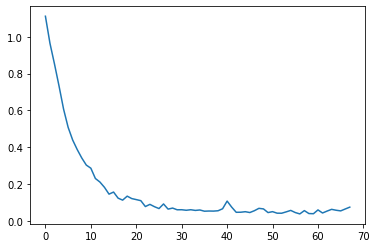

In [ ]:
# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp.loss_curve_
plt.plot(loss_values)
#plt.savefig("./Plot_of_loss_values.png")
plt.show()

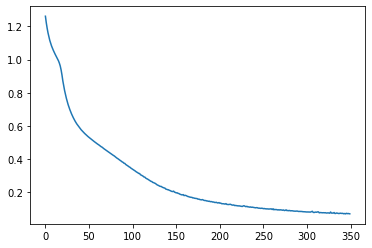

In [ ]:
# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp2.loss_curve_
plt.plot(loss_values)
plt.savefig("./Plot_of_loss_values2.png")
plt.show()

## 1.2 Alles in einem Block
Alles zusammen in einem Coding-Block ohne Prints

[[5.1  3.5  1.4  0.2  0.  ]
 [4.9  3.   1.4  0.2  0.  ]
 [4.7  3.2  1.3  0.2  0.  ]
 [4.6  3.1  1.5  0.2  0.  ]
 [5.   3.6  1.4  0.2  0.  ]
 [5.4  3.9  1.7  0.4  0.  ]
 [4.6  3.4  1.4  0.3  0.  ]
 [5.   3.4  1.5  0.2  0.  ]
 [4.4  2.9  1.4  0.2  0.  ]
 [4.9  3.1  1.5  0.1  0.  ]
 [5.4  3.7  1.5  0.2  0.  ]
 [4.8  3.4  1.6  0.2  0.  ]
 [4.8  3.   1.4  0.1  0.  ]
 [4.3  3.   1.1  0.1  0.  ]
 [5.8  4.   1.2  0.2  0.  ]
 [5.7  4.4  1.5  0.4  0.  ]
 [5.4  3.9  1.3  0.4  0.  ]
 [5.1  3.5  1.4  0.3  0.  ]
 [5.7  3.8  1.7  0.3  0.  ]
 [5.1  3.8  1.5  0.3  0.  ]
 [5.4  3.4  1.7  0.2  0.  ]
 [5.1  3.7  1.5  0.4  0.  ]
 [4.6  3.6  1.   0.2  0.  ]
 [5.1  3.3  1.7  0.5  0.  ]
 [4.8  3.4  1.9  0.2  0.  ]
 [5.   3.   1.6  0.2  0.  ]
 [5.   3.4  1.6  0.4  0.  ]
 [5.2  3.5  1.5  0.2  0.  ]
 [5.2  3.4  1.4  0.2  0.  ]
 [4.7  3.2  1.6  0.2  0.  ]
 [4.8  3.1  1.6  0.2  0.  ]
 [5.4  3.4  1.5  0.4  0.  ]
 [5.2  4.1  1.5  0.1  0.  ]
 [5.5  4.2  1.4  0.2  0.  ]
 [4.9  3.1  1.5  0.1  0.  ]
 [5.   3.2  1.2  0.2

Iteration 144, loss = 0.22410302
Iteration 145, loss = 0.21941468
Iteration 146, loss = 0.21839241
Iteration 147, loss = 0.21608404
Iteration 148, loss = 0.21550842
Iteration 149, loss = 0.21457556
Iteration 150, loss = 0.21209562
Iteration 151, loss = 0.20986645
Iteration 152, loss = 0.20817805
Iteration 153, loss = 0.20693185
Iteration 154, loss = 0.20505670
Iteration 155, loss = 0.20425953
Iteration 156, loss = 0.20240473
Iteration 157, loss = 0.20190131
Iteration 158, loss = 0.19965878
Iteration 159, loss = 0.20301436
Iteration 160, loss = 0.19870065
Iteration 161, loss = 0.19785804
Iteration 162, loss = 0.19422454
Iteration 163, loss = 0.19326371
Iteration 164, loss = 0.19221855
Iteration 165, loss = 0.19118070
Iteration 166, loss = 0.18990076
Iteration 167, loss = 0.18813884
Iteration 168, loss = 0.18725409
Iteration 169, loss = 0.18806056
Iteration 170, loss = 0.18469828
Iteration 171, loss = 0.18528258
Iteration 172, loss = 0.18180941
Iteration 173, loss = 0.18161010
Iteration 

c:\orange3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 1.28104676
Iteration 3, loss = 1.20978976
Iteration 4, loss = 1.14618262
Iteration 5, loss = 1.08821716
Iteration 6, loss = 1.03964240
Iteration 7, loss = 0.99256447
Iteration 8, loss = 0.95375423
Iteration 9, loss = 0.91867435
Iteration 10, loss = 0.88965458
Iteration 11, loss = 0.86240755
Iteration 12, loss = 0.83892709
Iteration 13, loss = 0.81905794
Iteration 14, loss = 0.79914298
Iteration 15, loss = 0.78250175
Iteration 16, loss = 0.76739658
Iteration 17, loss = 0.75291132
Iteration 18, loss = 0.74001633
Iteration 19, loss = 0.72781650
Iteration 20, loss = 0.71616846
Iteration 21, loss = 0.70537081
Iteration 22, loss = 0.69506966
Iteration 23, loss = 0.68553231
Iteration 24, loss = 0.67565576
Iteration 25, loss = 0.66692363
Iteration 26, loss = 0.65784393
Iteration 27, loss = 0.64994504
Iteration 28, loss = 0.64126588
Iteration 29, loss = 0.63376492
Iteration 30, loss = 0.62546205
Iteration 31, loss = 0.61813982
Iteration 32, loss = 0.61060554
Iteration 33, l

Iteration 268, loss = 0.05558089
Iteration 269, loss = 0.05460803
Iteration 270, loss = 0.05666158
Iteration 271, loss = 0.05413088
Iteration 272, loss = 0.05338279
Iteration 273, loss = 0.05298726
Iteration 274, loss = 0.05315231
Iteration 275, loss = 0.05241316
Iteration 276, loss = 0.05276499
Iteration 277, loss = 0.05252974
Iteration 278, loss = 0.05270738
Iteration 279, loss = 0.05217916
Iteration 280, loss = 0.05251747
Iteration 281, loss = 0.05173942
Iteration 282, loss = 0.05124806
Iteration 283, loss = 0.05184299
Iteration 284, loss = 0.05462286
Iteration 285, loss = 0.05226305
Iteration 286, loss = 0.05124733
Iteration 287, loss = 0.04996646
Iteration 288, loss = 0.05117337
Iteration 289, loss = 0.05132816
Iteration 290, loss = 0.05084303
Iteration 291, loss = 0.05089822
Iteration 292, loss = 0.05015620
Iteration 293, loss = 0.05170483
Iteration 294, loss = 0.05084728
Iteration 295, loss = 0.04971756
Iteration 296, loss = 0.05046784
Iteration 297, loss = 0.04959111
Iteration 

c:\orange3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


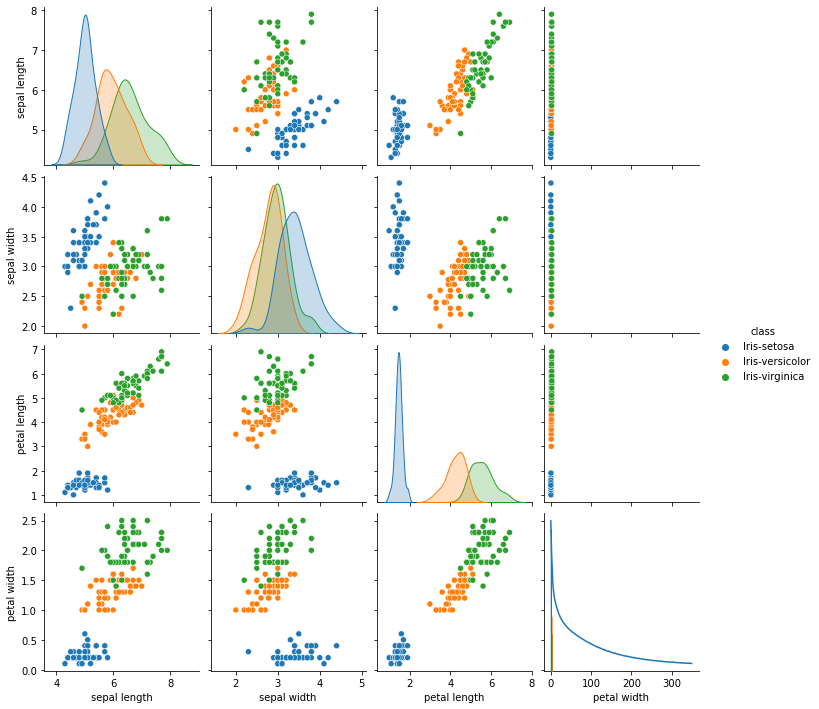

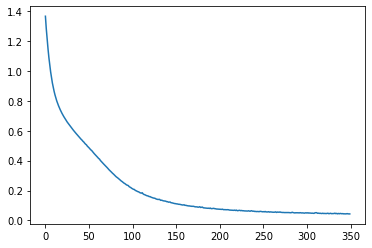

In [ ]:
# 1. Import aller nötigen Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
# -------------------------------------------------------------------
# 2. Import des Datensatzes und Überführung in ein Pandas-Dataframe
iris = pd.read_csv('data/iris_cleaned.csv')
iris.head()

# 3. Datensatz verstehen
len(iris)
iris.describe()
iris.corr()
sns.pairplot(iris, hue="class", height=2.5)

# 4. Wandlung der Klassen in numerische Werte
iris.loc[iris['class']=='Iris-setosa','class']=0
iris.loc[iris['class']=='Iris-versicolor','class']=1
iris.loc[iris['class']=='Iris-virginica','class']=2
iris = iris.apply(pd.to_numeric)
iris.head()

# Überführen des Pandas-Dataframe in einen numpy-array
iris_array = iris.values # oder iris.to_numpy()
print(iris_array)

# 5. Splitten des Datensatzes in Training- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(iris_array[:,:4], iris_array[:,4], test_size=0.2)
#print("Das ist mein Testdatensatz: ",X_test)
#print("Und das ist mein gesuchtes Target im Testdatensatz: ", y_test)

# 6. Trainieren des gewählten Modells und Überprüfung des Trainingsdatensatzes anhand der Loss-Kurve und der Confusion Matrix
mlp = MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)
mlp2 = MLPClassifier(hidden_layer_sizes=(5,3),activation='tanh', solver='adam', max_iter=350, batch_size=10, verbose=True)
# Das neuronale Netz wird mit den Trainingsdaten traniert
mlp.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# 7. Überprüfen des Testdatensatzes. Dieser gibt Auskunft darüber ob das Modell ausreichend verallgemeinert.
predictions = mlp.predict(X_test)
predictions2 = mlp2.predict(X_test)
# Evaluationsergebnisse des Trainings- und Testdatensatz für das erste Modell
print("Trainingsergebnis: %5.3f" % mlp.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions))
# Evaluationsergebnisse des Trainings- und Testdatensatz für das zweite Modell
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp2.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions2))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions2))
# Das Modell wird beispielsweise zur Vorhersage auf folgenden Werten
# aus dem Testset angewandt mit den Merkmalen [sepal-length, sepal-width,
# petal-length, petal-width]
print(mlp.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))
print(mlp2.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))
# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.savefig("./Plot_of_loss_values.png")
plt.show()
# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp2.loss_curve_
plt.plot(loss_values)
plt.savefig("./Plot_of_loss_values2.png")
plt.show()